# Fake News Detection

## Objective:
In this notebook, we will classify fake news on the basis of several factors. Each factor will be trained against the separately related dataset. Later these trained models will be used to predict against master dataset and added as a column in order to predict fakeness.<br>

High level a polynomial equation to predict is <br>

**y = a1(number of words) + a2(Domain Rank) + a3(Political Affiliation) + a4(Toxicity Detection) + a5(Spam Detection) +a6(Stance Detection) + a7(Clickbait) + a8(News Category Determination) + a9(Sentiment)**

<br>
DataDource: <br>
https://www.kaggle.com/mrisdal/fake-news<br>

* uuidUnique identifier
* ord_in_thread
* authorauthor of story
* publisheddate published
* titletitle of the story
* texttext of story
* languagedata from webhose.io
* crawleddate the story was archived
* site_urlsite URL from BS detector
* countrydata from webhose.io
* domain_rankdata from webhose.io
* thread_title
* spam_scoredata from webhose.io
* main_img_urlimage from story
* replies_countnumber of replies
* participants_countnumber of participants
* likesnumber of Facebook likes
* commentsnumber of Facebook comments
* sharesnumber of Facebook shares
* typetype of website (label from BS detector)

<br>
https://www.kaggle.com/jruvika/fake-news-detection

## Team Responsibilities

*   Gyanesh Pandey - 012506936 :  Stance Detection, Spam Detection
*   Manoj Kumar - 012494989 : Toxicity Detection, News Category Determination, Domain Rank
*   Shalini Narang - 012507573 : Click Bait, Sentiment Analysis, Echo Chamber
*   Yamini Muralidharen - 012449632 : Political Affiliation, Domain Rank

Everyone participated in Data Preprocessing and fake news detection master file.

**Project links:**<br>
Master Notebook: https://colab.research.google.com/drive/1XUkF7leYm_8QIpUCfz6HM7-TWDKbegRf#scrollTo=dPZUbRpq4_0v<br>
Factor Models: https://github.com/manojknit/MachineLearningModels/tree/master/NLP_FakeNews<br>
Datasets: https://github.com/manojknit/MachineLearningModels/tree/master/dataset <br>
Data Enrichment code: https://github.com/manojknit/MachineLearningModels/tree/master/DataEnrich <br>


## Project Journey

‘Fake News’ is one of the most debated topics in the context of current political discourse across the world. In the 2016 presidential election in US, the impact of misleading ‘News’ like articles received a substantial attention, particularly after the election of President Trump. According to a Pew Research poll*, 64% of adults in US say that fake news has left them confused about basic facts. Given the ubiquity of internet and ease of disseminating unverified information on internet, it is imperative that we need to develop tools and methods to indicate the veracity of a piece of information.

We, the team Sigmoid felt that it is our social responsibility to make use of our knowledge and build a system using machine learning, that could help decide if the news is fake or not. 

#### We started with Fake News data set provided by Kaggle.com. During our initial analysis we realized that the data set had a very limited set of features. We also felt that the dataset can be further enriched by adding domain ranking and spam detection features to identify whether the news is fake or not. Data was only having fake news so we balance it by adding real news from from different data source. 

### Data Preprocessing: 
Data set was not even readable format so performed tons of data preprocession(cleansing, formatting, selection, transformation etc.)
1. Replaced null
2. Special character handling
3. Structuring news content
4. Transformed Real News data from file level to original fake news format.
5. Encoding

### Data Enrichment:
1. Downloaded real news data(https://webhose.io/datasets/) and formatted to align to merge in Kaggle fake news data. Also scrapped from google news.
  - Python code: https://github.com/manojknit/MachineLearningModels/blob/master/DataEnrich/Webhose_RealNews_DataPull.py
  - Output file: https://github.com/manojknit/MachineLearningModels/blob/master/dataset/fake_real_dataset.csv
2. Used Alexa API to get domain ranking data.
  - Python code: https://github.com/manojknit/MachineLearningModels/blob/master/Regression/fetch_domain_rank.py
  - Output file: https://github.com/manojknit/MachineLearningModels/blob/master/dataset/fake_real_dataset.csv
3. Added column by running spam detection madel. 
  - Python code: https://github.com/manojknit/MachineLearningModels/blob/master/DataEnrich/Spam_Score.py
  - Output Data set : https://github.com/manojknit/MachineLearningModels/blob/master/dataset/fake_real_dataset_spam.csv
 
### Latent Manifold:
 After data enrichment we found latent variables like domain rank, spam score. We fount Domain Rank as Latent Manifold.
 
Following diagram depicts the data enrichment process for fake news.

![Fake news data enrichment ](https://s3-us-west-2.amazonaws.com/themodestwhite.com/ml_fn.jpg)

Once the dataset was sufficiently enriched, we tried executing a couple of machine learning algorithms on our dataset. We encountered following issues:
1. Any sophisticated approach to identify fake news uses **"NLP"** techniques. We as a team didn't have much knowledge on NLP at the time so we put this on hold.
2. Also, the data didn't have many numerical columns that could be used for many classification algorithms. We were not familiar with **"Vectorization"** techniques which could use a piece of text transformed into a **"bag-of-words"**.

We learn't that we need more time and expertise to handle this problem statement. Hence we decided to put Fake News on hold and work on another related problem, that can better justify covered models in class **"The impact of social network ads."**. We tried sever models like linear regression and clustering but we did not see expected results however classification worked quite well and we were able to predict fake or not for dataset.

### Conclusion:
...

In the following sections we will  discuss the project in detail.

## Distillation

As seen in the following image we performed several distillation and after the amalgamation, we came up with our master data set. This data set went through some pre-processing like hot encoding of columns. 

<img src="https://s3-us-west-2.amazonaws.com/themodestwhite.com/distillation.png">

The final polynomial equation used for prediction was created considering all the parameters shown in the following image

<img src="https://s3-us-west-2.amazonaws.com/themodestwhite.com/final_eq_img.png">

In [0]:
# ignoring warnings to remove clutter 
import warnings
warnings.filterwarnings('ignore')

In [0]:
import os
import json
import string
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

!pip install gensim
!pip install lightgbm

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords  # stop words are, is, the etc. which are not needed for model
from nltk.stem.porter import PorterStemmer
from gensim.models import word2vec
from sklearn.manifold import TSNE

%matplotlib inline

from plotly import tools  # to install $ pip install plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.tree import DecisionTreeClassifier 
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb # to install $ pip install lightgbm
from PIL import Image

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

    100% |████████████████████████████████| 23.6MB 1.2MB/s 
    100% |████████████████████████████████| 1.4MB 13.9MB/s 
    100% |████████████████████████████████| 133kB 26.0MB/s 
    100% |████████████████████████████████| 5.1MB 5.6MB/s 
    100% |████████████████████████████████| 61kB 21.1MB/s 
    100% |████████████████████████████████| 552kB 22.5MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file
    100% |████████████████████████████████| 1.2MB 14.5MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
!rm *.*
!ls

rm: cannot remove '*.*': No such file or directory
sample_data


In [0]:
# only for google colab
#from google.colab import files
#uploaded = files.upload()

In [0]:
!wget https://raw.githubusercontent.com/manojknit/PySpark_Python-ML-Models/master/dataset/fake_real_dataset_spam_category_clickbait_toxicity_politafln_sentiment_stance.csv
#!wget https://raw.githubusercontent.com/manojknit/MachineLearningModels/master/dataset/fake_real_dataset_spam_category_clickbait_toxicity_politafln_sentiment_stance.csv?token=Ad6Lblvwocf9JHxeobZOxuI0oDd-4XT7ks5cBHGOwA%3D%3D                             

--2018-12-05 20:25:43--  https://raw.githubusercontent.com/manojknit/PySpark_Python-ML-Models/master/dataset/fake_real_dataset_spam_category_clickbait_toxicity_politafln_sentiment_stance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13574989 (13M) [text/plain]
Saving to: ‘fake_real_dataset_spam_category_clickbait_toxicity_politafln_sentiment_stance.csv’

fake_real_dataset_s 100%[===================>]  12.95M  --.-KB/s    in 0.1s    

2018-12-05 20:25:43 (130 MB/s) - ‘fake_real_dataset_spam_category_clickbait_toxicity_politafln_sentiment_stance.csv’ saved [13574989/13574989]



In [0]:
from io import BytesIO
#df = pd.read_csv(StringIO('fake_real_dataset_spam_category_clickbait_toxicity.csv'))
#df = pd.read_csv(BytesIO(uploaded['fake_real_dataset_spam_category_clickbait_toxicity_politafln.csv'])) # for old python version
#df = pd.read_csv('fake_real_dataset_spam_category_clickbait_toxicity_politafln_sentiment_stance.csv?token=Ad6Lblvwocf9JHxeobZOxuI0oDd-4XT7ks5cBHGOwA%3D%3D')
df = pd.read_csv('fake_real_dataset_spam_category_clickbait_toxicity_politafln_sentiment_stance.csv')

In [0]:
#df = pd.read_csv('../dataset/FakeAndReal09_17_25.tsv', sep='\t')
#df = pd.read_csv('../dataset/fake_real_dataset_spam.csv')
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 4].values

print(df.shape)
#print(df.describe())
df.head()

(3709, 32)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,content,spam_score_fector,category_factor,fake,click_bait_score,toxicity_factor,src_url_polarity,sentiment_score,stance
0,0,0,0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,88465,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print they pay back money plus interest the en...,0.993337,business,0,0.999951,0,1.0,0.1355,discuss
1,1,1,1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,88465,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,why did attorney general loretta lynch plead t...,0.824470,business,0,0.997981,0,1.0,0.0000,discuss
2,2,2,2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,88465,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,red state fox news sunday reported morning ant...,0.998415,business,0,0.001113,0,1.0,0.0000,discuss
3,3,3,3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,88465,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,email kayla mueller prisoner tortured isis cha...,0.982233,sport,0,0.001539,0,1.0,-0.2680,discuss
4,4,4,4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,88465,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,email healthcare reform to make america great ...,0.976653,business,0,0.998544,0,1.0,0.4670,unrelated


In [0]:
# Drop unwanted columns
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'ord_in_thread', 'replies_count', 'participants_count', 'country','likes', 'comments', 'site_url', 'language','content', 'ord_in_thread', 'uuid', 'crawled'], axis=1, inplace=True)

In [0]:
df.head()

,author,published,title,text,domain_rank,thread_title,spam_score,main_img_url,shares,type,spam_score_fector,category_factor,fake,click_bait_score,toxicity_factor,src_url_polarity,sentiment_score,stance
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,Print They should pay all the back all the mon...,88465,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,bias,0.993337,business,0,0.999951,0,1.0,0.1355,discuss
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,88465,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,bias,0.824470,business,0,0.997981,0,1.0,0.0000,discuss
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,88465,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,bias,0.998415,business,0,0.001113,0,1.0,0.0000,discuss
3,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,88465,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,bias,0.982233,sport,0,0.001539,0,1.0,-0.2680,discuss
4,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,88465,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,bias,0.976653,business,0,0.998544,0,1.0,0.4670,unrelated


In [0]:
# Fix for plotly
##only for colab
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state() # should be called in each cell https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory

## Data Cleansing

In [0]:
# Handel if title or news content is blank 

import math
def title_column(tuple1):
    #print(tuple1[2])
    if(type(tuple1[0]) == float or type(tuple1[0]) == int):
        if(math.isnan(tuple1[0])):
            tuple1[0] = ''
            
    if(pd.notna(tuple1[0])):
        if(tuple1[0].strip(' \t\n\r') == ''):
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[1])
        else:
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[0])
    else:
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[0])
        
        
def text_column(tuple1):
    #print(tuple1[2])
    if(type(tuple1[1]) == float or type(tuple1[1]) == int):
        if(math.isnan(tuple1[1])):
            tuple1[1] = ''
            
    if(pd.notna(tuple1[1])):
        if(tuple1[1].strip(' \t\n\r') == ''):
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[0])
        else:
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[1]) 
    else:
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[1])
      
df['title'] = df[['title', 'text']].apply(title_column, axis=1)
df['text'] = df[['title', 'text' ]].apply(text_column, axis=1)

In [0]:

nltk.download('punkt')
from nltk import word_tokenize

import pdb
def CleaningText(txt):
    review = re.sub('[^a-zA-Z]', ' ', txt) # Cleans all except characters
    #print("lin1")
    review = review.lower()
    #print("lin2")
    review = review.split()
    #print("lin3")
    ps = PorterStemmer()
    #print("lin4")
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #print("lin5")
    review = ' '.join(review)
    #print("lin6")
    return review

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
temp_published = df['published'].apply(lambda x: x[slice(10)])
df['published']=pd.to_datetime(temp_published,format="%Y-%M-%d")
#df['year']=df['published'].dt.year  #df.year.unique()

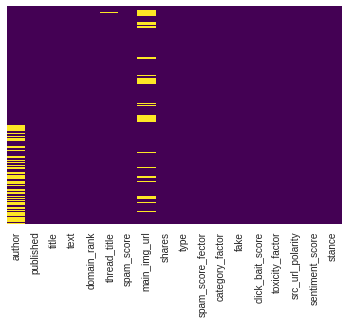

In [0]:
# to check missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
#dft = df.loc[:, ['domain_rank', 'shares', 'type']]
#print(dft.shape)

# clean text 
df['text'] = df['text'].apply(lambda x: CleaningText(x))
df.text.fillna(df.title, inplace=True)

In [0]:
df.columns

Index(['author', 'published', 'title', 'text', 'domain_rank', 'thread_title',
       'spam_score', 'main_img_url', 'shares', 'type', 'spam_score_fector',
       'category_factor', 'fake', 'click_bait_score', 'toxicity_factor',
       'src_url_polarity', 'sentiment_score', 'stance'],
      dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder
lb_encode = LabelEncoder()
#df['type_num']= lb_encode.fit_transform(df['type'])
df['category_factor_num'] = lb_encode.fit_transform(df['category_factor'])
#df['stance_factor_num'] = lb_encode.fit_transform(df['stance'])
df['stance_factor_num'] = 0
df.loc[df.stance.str.contains('discuss'),'stance_factor_num'] = 0.3
df.loc[df.stance.str.contains('unrelated'),'stance_factor_num'] = 1.0      
df.loc[df.stance.str.contains('agree'),'stance_factor_num'] = 0  
df.loc[df.stance.str.contains('disagree'),'stance_factor_num'] = 0.8

df.head()

,author,published,title,text,domain_rank,thread_title,spam_score,main_img_url,shares,type,spam_score_fector,category_factor,fake,click_bait_score,toxicity_factor,src_url_polarity,sentiment_score,stance,category_factor_num,stance_factor_num
0,Barracuda Brigade,2016-01-26 00:10:00,Muslims BUSTED They Stole Millions In Gov t...,print pay back money plu interest entir famili...,88465,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,bias,0.993337,business,0,0.999951,0,1.0,0.1355,discuss,0,0.3
1,reasoning with facts,2016-01-29 00:10:00,Re Why Did Attorney General Loretta Lynch Ple...,attorney gener loretta lynch plead fifth barra...,88465,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,bias,0.824470,business,0,0.997981,0,1.0,0.0000,discuss,0,0.3
2,Barracuda Brigade,2016-01-31 00:10:00,BREAKING Weiner Cooperating With FBI On Hilla...,red state fox news sunday report morn anthoni ...,88465,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,bias,0.998415,business,0,0.001113,0,1.0,0.0000,discuss,0,0.3
3,Fed Up,2016-01-01 00:11:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,email kayla mueller prison tortur isi chanc re...,88465,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,bias,0.982233,sport,0,0.001539,0,1.0,-0.2680,discuss,3,0.3
4,Fed Up,2016-01-01 00:11:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,email healthcar reform make america great sinc...,88465,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,bias,0.976653,business,0,0.998544,0,1.0,0.4670,unrelated,0,1.0


In [0]:
df.fake.unique()

array([0, 1])

# Exploratory Data Analysis (EDA)

## Let's check correlations in factors to determine multiplier factor.

In [0]:
#To show heatmap data should be in matrix form.
tc = df.corr()   #shows corelation in matrix form
tc

,domain_rank,spam_score,shares,spam_score_fector,fake,click_bait_score,toxicity_factor,src_url_polarity,sentiment_score,category_factor_num,stance_factor_num
domain_rank,1.000000,-0.064454,-0.020997,0.120741,-0.249628,0.028643,0.020848,0.014631,0.032460,0.065091,0.003630
spam_score,-0.064454,1.000000,0.006128,-0.103725,0.172558,0.029195,0.013025,-0.076754,0.049220,-0.049897,-0.099400
shares,-0.020997,0.006128,1.000000,0.005124,0.049648,-0.015414,-0.020004,-0.006060,0.052054,0.048855,-0.012603
spam_score_fector,0.120741,-0.103725,0.005124,1.000000,-0.601603,-0.013450,0.035137,0.280719,-0.073461,0.029780,0.282897
fake,-0.249628,0.172558,0.049648,-0.601603,1.000000,-0.015002,-0.032278,-0.403428,0.087230,-0.021818,-0.506599
click_bait_score,0.028643,0.029195,-0.015414,-0.013450,-0.015002,1.000000,0.007328,0.013047,-0.013451,-0.010713,-0.001464
toxicity_factor,0.020848,0.013025,-0.020004,0.035137,-0.032278,0.007328,1.000000,0.027776,-0.010067,0.006385,-0.004188
src_url_polarity,0.014631,-0.076754,-0.006060,0.280719,-0.403428,0.013047,0.027776,1.000000,-0.064444,-0.002938,0.178983
sentiment_score,0.032460,0.049220,0.052054,-0.073461,0.087230,-0.013451,-0.010067,-0.064444,1.000000,0.070755,-0.047109
category_factor_num,0.065091,-0.049897,0.048855,0.029780,-0.021818,-0.010713,0.006385,-0.002938,0.070755,1.000000,0.059410


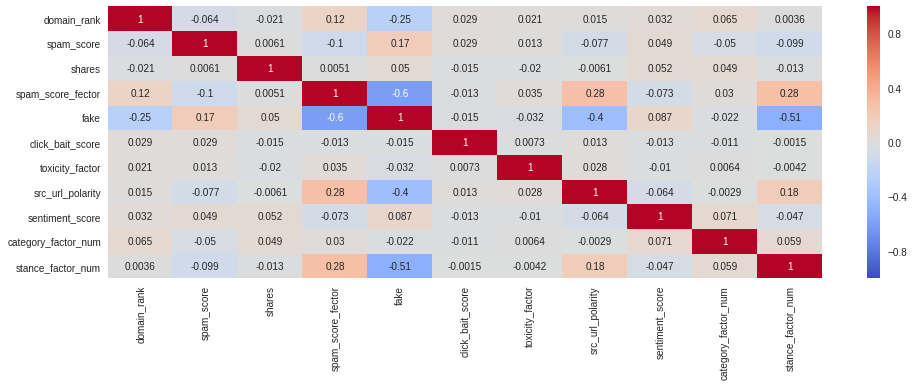

In [0]:
plt.figure(figsize = (16,5))
sns.heatmap(tc, annot=True, cmap='coolwarm')

## Pair Plot

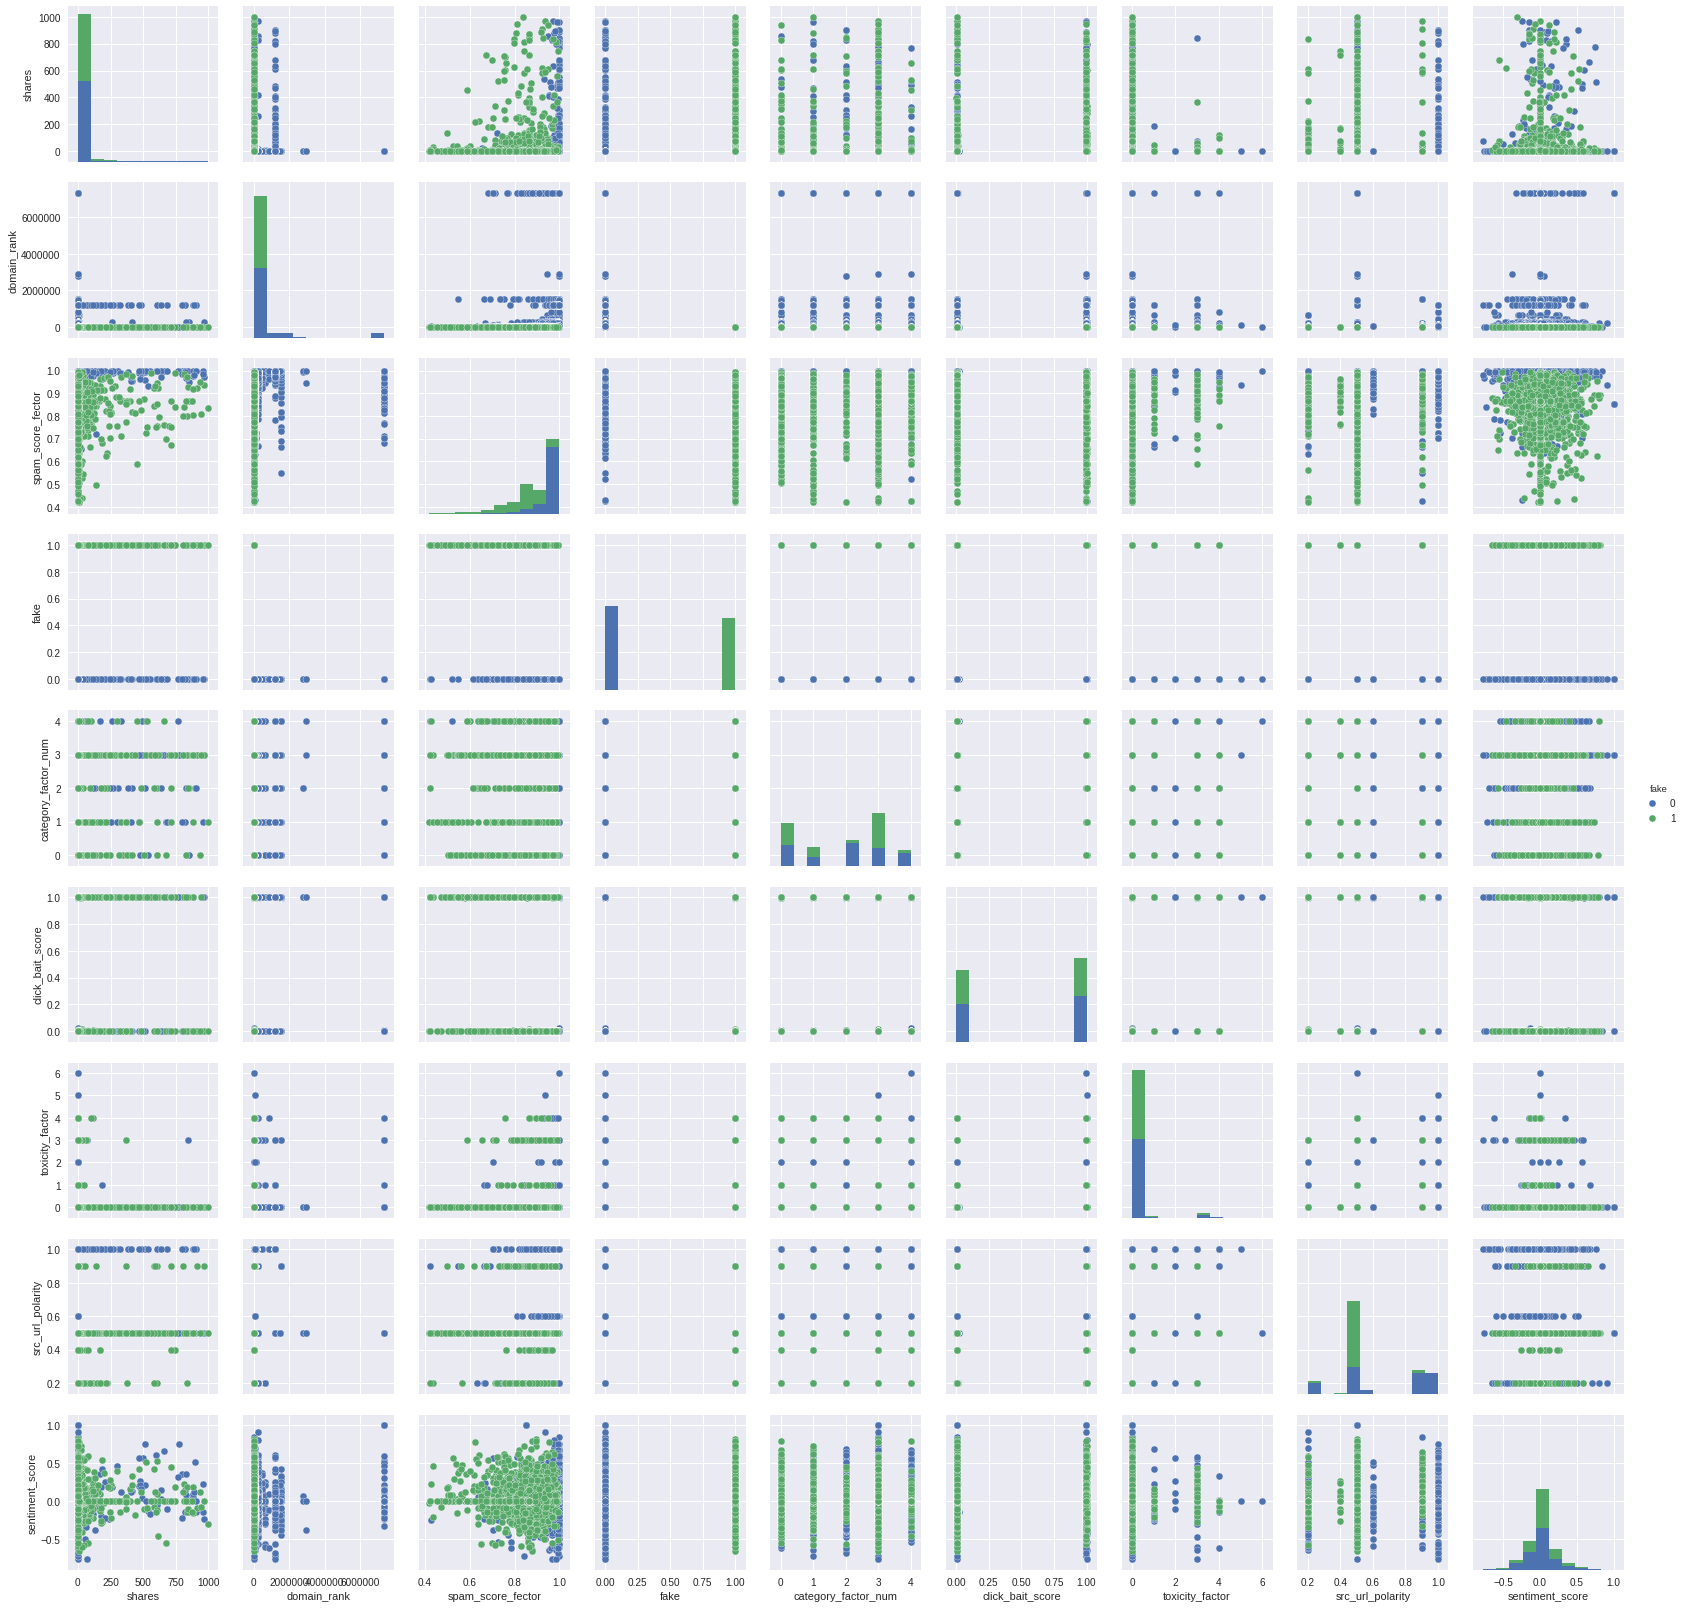

In [0]:
# to see pattern

dk= df[[ 'shares','domain_rank','spam_score_fector','fake','category_factor_num','click_bait_score','toxicity_factor','src_url_polarity','stance','sentiment_score']]
dk.head()
sns.pairplot(data=dk, hue="fake", dropna='true')

## Target Distribution
First let us look at the distribution of the target variable to understand more about the imbalance and so on.

In [0]:
#plotly fix
configure_plotly_browser_state()

## target count ##
cnt_srs = df['type'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Target Count',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

## target distribution ##
labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Target distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

So about 53.8% of the data is insincere news (target=1) and rest of them are sincere news.

## Word Cloud

Now let us look at the frequently occuring words in the data by creating a word cloud on the 'text' column.

In [0]:
!pip install wordcloud
import requests
from wordcloud import WordCloud, STOPWORDS  #install $ pip install wordcloud

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  


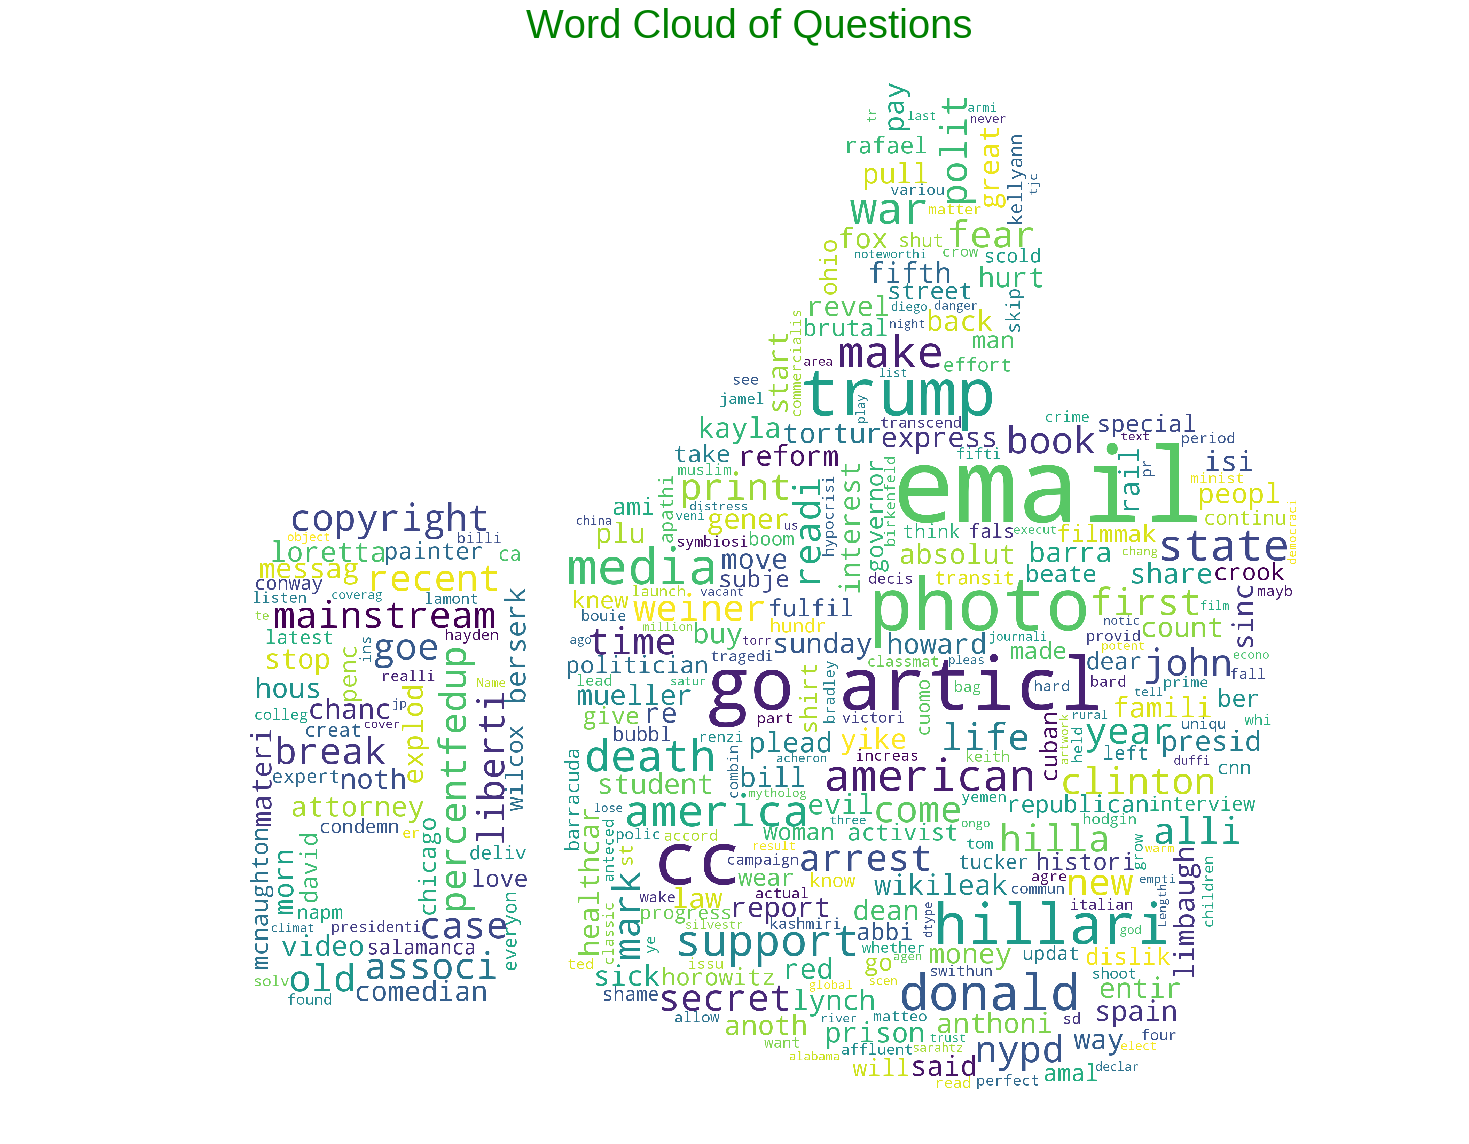

In [0]:
#Word cloud for real words
response = requests.get('https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png')
upvote_mask = np.array(Image.open(BytesIO(response.content)))#https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png
plot_wordcloud(df[df["fake"]==0]["text"], upvote_mask, max_words=300000, max_font_size=300, title="Word Cloud of Questions")

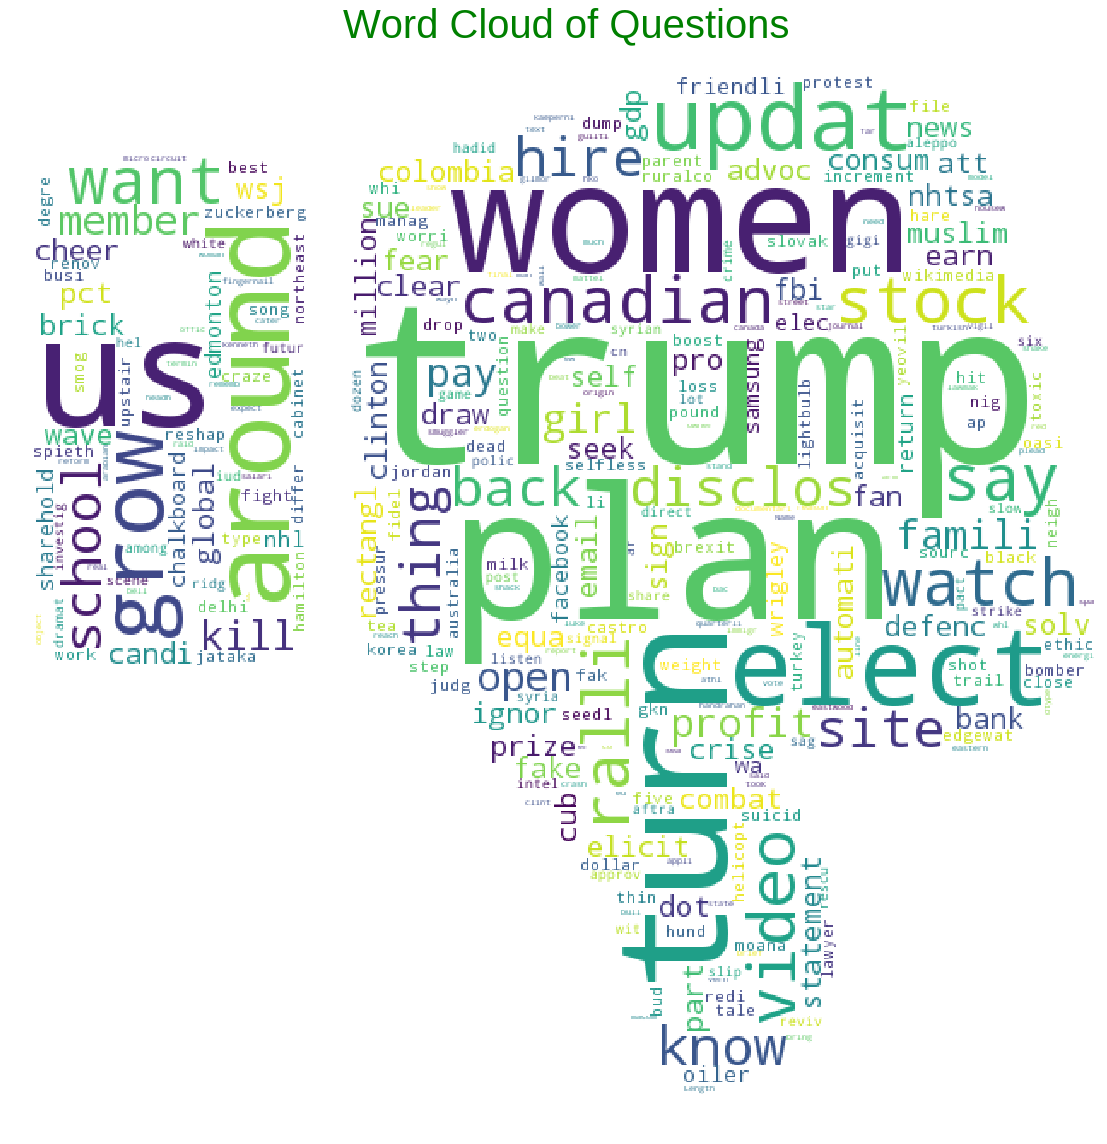

In [0]:
#Word cloud for Fake words
response = requests.get('https://image.freepik.com/free-icon/thumbs-down-silhouette_318-41911.jpg')
upvote_mask = np.array(Image.open(BytesIO(response.content)))#https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png
plot_wordcloud(df[df["fake"]==1]["text"], upvote_mask, max_words=300000, max_font_size=300, title="Word Cloud of Questions")

There seem to be a variety of segregating words are there. May be it is a good idea to look at the most frequent words in each of the classes separately and compare.

### Word Frequency plot of real and fake news:

In [0]:
from collections import defaultdict
df_real = df[df["type"]=='news']
df_fake = df[df["type"]!='news']

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [0]:
# for colab plotly
configure_plotly_browser_state()

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in df_real["text"]:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in df_fake["text"]:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of real news", 
                                          "Frequent words of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

#plt.figure(figsize=(10,16))
#sns.barplot(x="ngram_count", y="ngram", data=fd_sorted.loc[:50,:], color="b")
#plt.title("Frequent words for Insincere Questions", fontsize=16)
#plt.show()

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



**Observations:**

* Some of the top words are common across both the classes like 'trump', 'elect', 'obama' etc
* The other top words in real news after excluding the common ones at the very top are 'open', 'question' etc
* The other top words in insincere questions after excluding the common ones are 'trump', 'men', 'us' etc <br>

**Now let us also create bigram frequency plots for both the classes separately to get more idea.**

In [0]:
# for colab plotly
configure_plotly_browser_state()

freq_dict = defaultdict(int)
for sent in df_real["text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


freq_dict = defaultdict(int)
for sent in df_fake["text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of real news", 
                                          "Frequent bigrams of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



**Observations:**

* We can see fake news are targating specific people, country, race or age.

**Now let's usl look at the trigram plots as well.**

In [0]:
# for colab plotly
configure_plotly_browser_state()

freq_dict = defaultdict(int)
for sent in df_real["text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')


freq_dict = defaultdict(int)
for sent in df_fake["text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams of real news", 
                                          "Frequent trigrams of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



**Observations:**

We can see fake news are targating specific people, Country, race or age.

## Meta Features:

Now let us create some meta features and then look at how they are distributed between the classes. The ones that we will create are

1. Number of words in the text
2. Number of unique words in the text
3. Number of characters in the text
4. Number of stopwords
5. Number of punctuations
6. Number of upper case words
7. Number of title case words
8. Average length of the words

In [0]:
## Number of words in the text ##
df["num_words"] = df["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df["num_unique_words"] = df["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df["num_chars"] = df["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
df["num_stopwords"] = df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
df["num_punctuations"] =df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
df["num_words_upper"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
df["num_words_title"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
df["mean_word_len"] = df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

**Now let us see how these meta features are distributed between both fake and real news.**

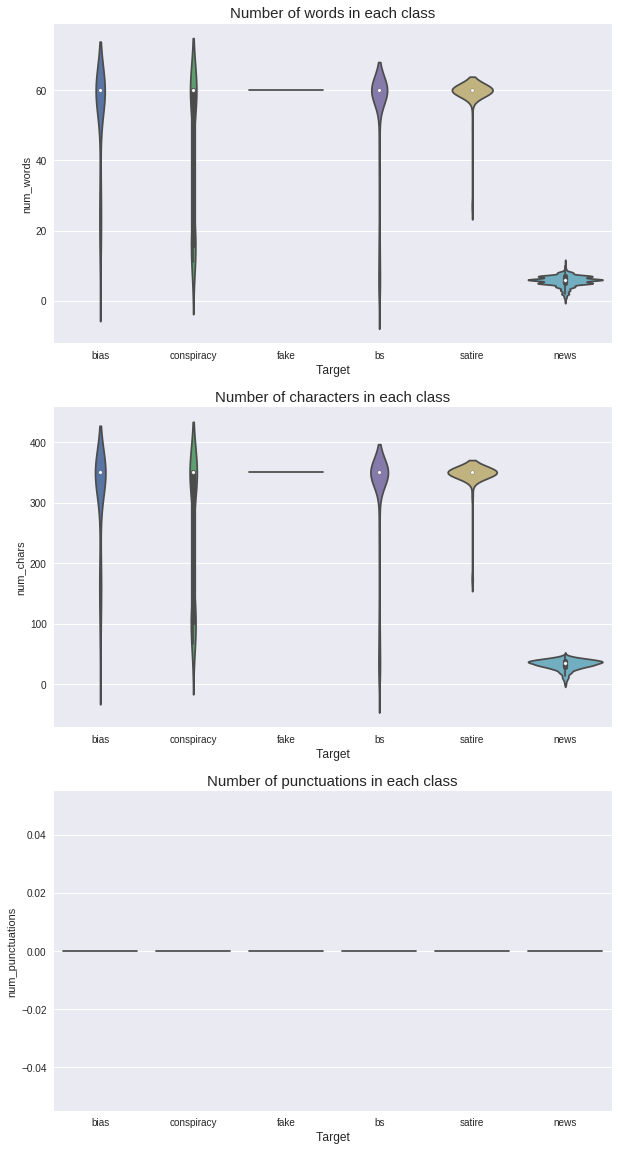

In [0]:
## Truncate some extreme values for better visuals ##
df['num_words'].loc[df['num_words']>60] = 60 #truncation for better visuals
df['num_punctuations'].loc[df['num_punctuations']>10] = 10 #truncation for better visuals
df['num_chars'].loc[df['num_chars']>350] = 350 #truncation for better visuals

f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.violinplot(x='type', y='num_words', data=df, ax=axes[0])
axes[0].set_xlabel('Target', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.violinplot(x='type', y='num_chars', data=df, ax=axes[1])
axes[1].set_xlabel('Target', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.violinplot(x='type', y='num_punctuations', data=df, ax=axes[2])
axes[2].set_xlabel('Target', fontsize=12)
#plt.ylabel('Number of punctuations in text', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)
plt.show()

**Inference:**

We can see that the fake news have more number of words as well as characters compared to real news. So this might be a useful feature in our model.

## Visualizing Word Vectors

In [0]:
import nltk
import re

from gensim.models import word2vec
from sklearn.manifold import TSNE

In [0]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in df["text"].iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
            
    return corpus

In [0]:
corpus = build_corpus(data)        
#corpus[0:2] # can see individual tokens

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

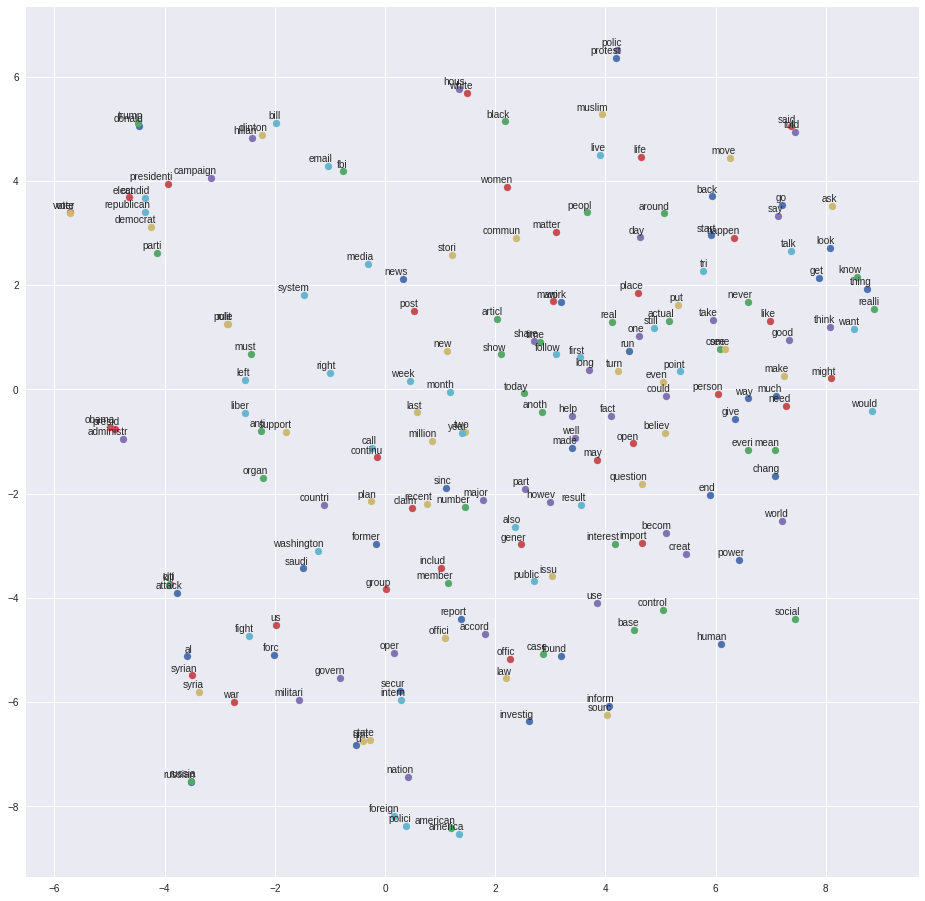

In [0]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

We can see tokens which are closer are similar.

In [0]:
model.most_similar('trump')

[('donald', 0.9889953136444092),
 ('presidenti', 0.7665268182754517),
 ('republican', 0.7603933215141296),
 ('candid', 0.6698929667472839),
 ('presid', 0.6459755301475525),
 ('hillari', 0.6159865856170654),
 ('elect', 0.5965195894241333),
 ('democrat', 0.5781201124191284),
 ('liber', 0.5740020275115967),
 ('support', 0.5680007338523865)]

#### Let's check correlation against target after massaging data and feature engineering.

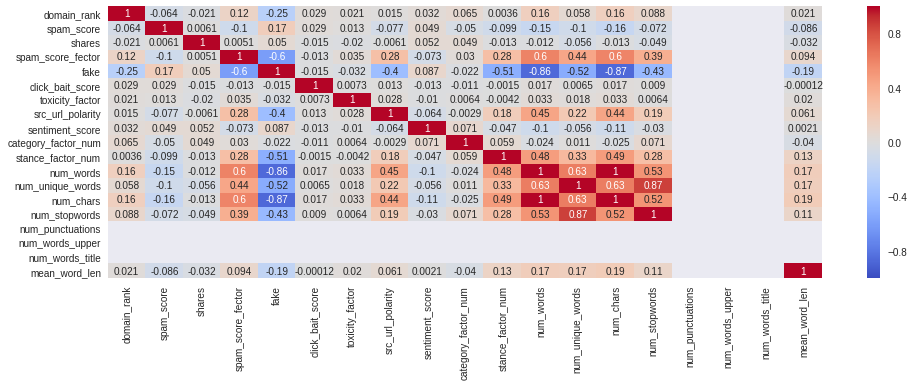

In [0]:
tc = df.corr()   #shows corelation in matrix form
plt.figure(figsize = (16,5))
sns.heatmap(tc, annot=True, cmap='coolwarm')

**Note:** As per importance we can say our NLP non scalar features are quite valuable along with Word count and domain rank.

## Encoding and Train Test Split 

It seems domain rank, num words are very important features which can creating overfitting. Let's devide features in two model to get uniform representation of all features.

In [0]:
# dropping columns which are not relevant or similar columns.
X = df[[ 'spam_score_fector','click_bait_score', 'category_factor_num', 'toxicity_factor','src_url_polarity','sentiment_score','stance_factor_num']]
#title	text	language	site_url	country	domain_rank	thread_title	spam_score	main_img_url	shares	type stance_factor_num'	spam_score_fector	category_factor	fake	click_bait_score	toxicity_factor	src_url_polarity	type_num
y = df['fake']

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 100)

**X and Y for domain rank and word count.**

In [0]:
# dropping columns which are not relevant or similar columns.
Xr = df[[ 'domain_rank','num_words']]
# target
yr = df['fake']

In [0]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=.25, random_state = 100)

## Model

We will run only models which can help to drive the importance of the factors and weight for prediction equation. We will visualize equation at the end as per model driven weight. We believe model driven equation will be more accurate. 

### Model Validation Metrics

<b>ROC</b>                  

Receiver Operating Characteristic (ROC) metric is used to evaluate the classifier's output quality.ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis.

This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

<b>  Precision-Recall </b>
  
  Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

In [0]:
from sklearn.metrics import  average_precision_score, precision_recall_curve


# Function to get Precision recall curve
def get_prec_recall (y_test,y_pred):
    average_precision = average_precision_score(y_test, y_pred)
    print('Average precision-recall score : {}'.format(average_precision))
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='cyan')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    return

###Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
predictions = logmodel.predict(X_test)

In [0]:
#Getting feature importances 
print(logmodel.coef_)

[[-9.26806066  0.06669859  0.04989296 -0.01642439 -3.43554928  0.8165508
  -6.26049499]]


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.88      0.83      0.86       506
          1       0.81      0.87      0.84       422

avg / total       0.85      0.85      0.85       928



In [0]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logmodel, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8557979422913281

Model Accuracy for Logistic Regression: 0.8491379310344828


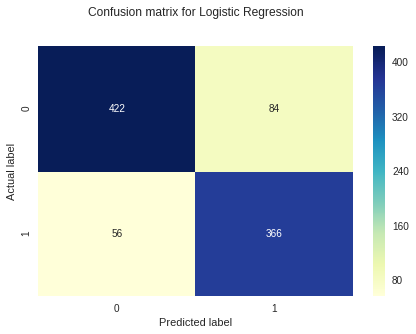

In [0]:
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_logreg = metrics.confusion_matrix(y_test, predictions)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Logistic Regression:",metrics.accuracy_score(y_test, predictions))

In [0]:
#from sklearn.metrics import accuracy_score 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,predictions)*100)

Accuracy :  84.91379310344827


In [0]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,predictions) #y_target, y_pred

0.15086206896551724

In [0]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test,predictions) #y_target, y_pred

0.15086206896551724

In [0]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test,predictions)

5.21066364382719

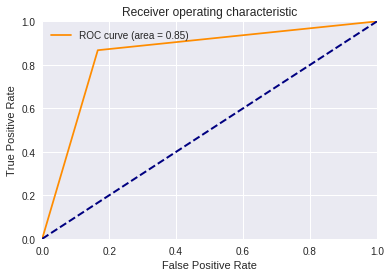

In [0]:
# Get ROC curve for Logistic Regression

get_roc(y_test,predictions)

As the area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test.

Average precision-recall score : 0.7657476711881027


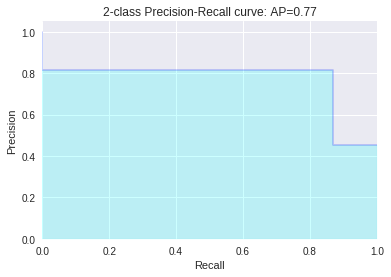

In [0]:
get_prec_recall(y_test,predictions)

###Logistic Regression Model evaluation based on K-fold cross-validation using cross_validate() function

In [0]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(logmodel, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(logmodel.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.847 (+/-0.056)
LogisticRegression average log_loss: 0.330 (+/-0.070)
LogisticRegression average auc: 0.938 (+/-0.039)


It can be seen that LogistiC Regression performs low in terms of accuracy of 85 % 

### Naive Bayes

Running Naive Bayes first to see model performance.

In [0]:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.91      0.88      0.90       506
          1       0.86      0.90      0.88       422

avg / total       0.89      0.89      0.89       928



In [0]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8831334932054358

Model Accuracy for Naive Bayes: 0.8879310344827587


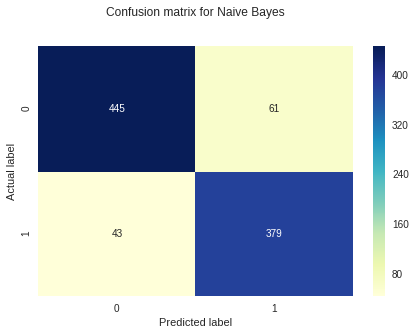

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_logreg = metrics.confusion_matrix(y_test, y_pred)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

In [0]:
#from sklearn.metrics import accuracy_score 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Accuracy :  88.79310344827587


In [0]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,y_pred) #y_target, y_pred

0.11206896551724138

In [0]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test,y_pred) #y_target, y_pred

0.11206896551724138

In [0]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

3.870777500553829

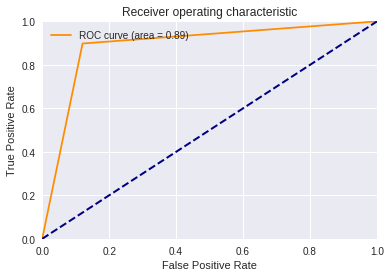

In [0]:
# Get ROC curve for Naive Bayes

get_roc(y_test,y_pred)

As the area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test.

Average precision-recall score : 0.8199305627776374


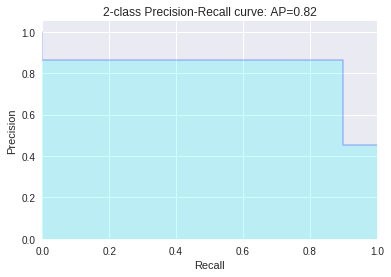

In [0]:
get_prec_recall(y_test,y_pred)

In [0]:
# Applying k-Fold Cross Validation for test set
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logmodel, X = X_test, y = y_test, cv = 10)
accuracies.mean()

0.8385142192116021

In [0]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(classifier, X_train, y_train, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(classifier.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
GaussianNB average accuracy: 0.883 (+/-0.020)
GaussianNB average log_loss: 0.373 (+/-0.081)
GaussianNB average auc: 0.950 (+/-0.011)


The Naive Bayes classfier performs better than Linear Regression with accuracy of 88%. The cross validation score also is better

###Decision Tree

In [0]:
decclassifier = DecisionTreeClassifier(criterion ='entropy')
decclassifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
y_pred = decclassifier.predict(X_test)

In [0]:
'''
!pip install pydotplus
!pip install graphviz
!pip install -Iv https://pypi.python.org/packages/source/p/pyparsing/pyparsing-1.5.7.tar.gz
!pip install --upgrade pydot
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(decclassifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
'''

'\n!pip install pydotplus\n!pip install graphviz\n!pip install -Iv https://pypi.python.org/packages/source/p/pyparsing/pyparsing-1.5.7.tar.gz\n!pip install --upgrade pydot\nfrom sklearn.externals.six import StringIO  \nfrom IPython.display import Image  \nfrom sklearn.tree import export_graphviz\nimport pydotplus\ndot_data = StringIO()\nexport_graphviz(decclassifier, out_file=dot_data,  \n                filled=True, rounded=True,\n                special_characters=True)\ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \nImage(graph.create_png())\n'

In [0]:

decclassifier.feature_importances_

array([0.52312672, 0.08383655, 0.03947843, 0.00226857, 0.19021783,
       0.05030791, 0.11076401])

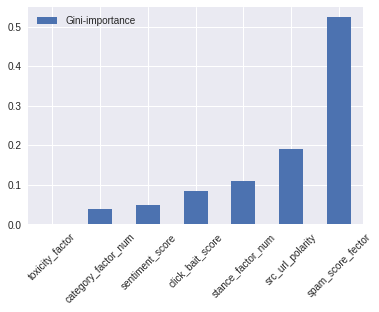

In [0]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, decclassifier.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

#### Validation

In [0]:
#Validation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[463,  43],
       [ 46, 376]])

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.91      0.92      0.91       506
          1       0.90      0.89      0.89       422

avg / total       0.90      0.90      0.90       928



In [0]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = decclassifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8982323818364663

Model Accuracy for Decision tree: 0.9040948275862069


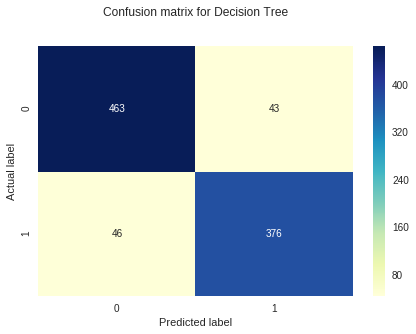

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_dectree = metrics.confusion_matrix(y_test, y_pred)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dectree), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Decision tree:",metrics.accuracy_score(y_test, y_pred))

In [0]:
#from sklearn.metrics import accuracy_score 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Accuracy :  90.40948275862068


In [0]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,y_pred) #y_target, y_pred

0.09590517241379311

In [0]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test,y_pred) #y_target, y_pred

0.09590517241379311

In [0]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

3.312484355427316

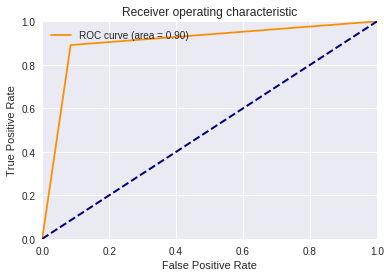

In [0]:
# Get ROC curve for Decision Tree

get_roc(y_test,y_pred)

As the area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test.

Average precision-recall score : 0.849125571745114


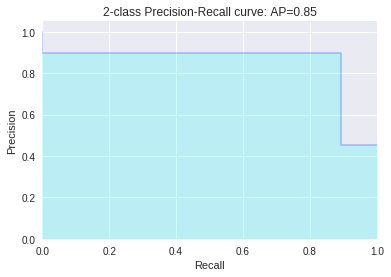

In [0]:
get_prec_recall(y_test,y_pred)

In [0]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = decclassifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8964312421030917

In [0]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(decclassifier, X_train, y_train, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(decclassifier.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
DecisionTreeClassifier average accuracy: 0.900 (+/-0.018)
DecisionTreeClassifier average log_loss: 3.465 (+/-0.633)
DecisionTreeClassifier average auc: 0.899 (+/-0.019)


The Decision tree is slightly better than Naive Bayes with 1 percent increase . It can be seen that Naive Bayes has  6% more mean cross validation score than Decision tree . The spam ,polarity and stance factors are determined as the most important features by this classifier

### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
rfc_pred = rfc.predict(X_test)

In [0]:
#'spam_score_fector','click_bait_score','toxicity_factor','src_url_polarity','sentiment_score','stance_factor_num'
rfc.feature_importances_

array([0.44464664, 0.07136863, 0.04524887, 0.0036758 , 0.20523024,
       0.05993125, 0.16989856])

#### Feature importance and weight determination

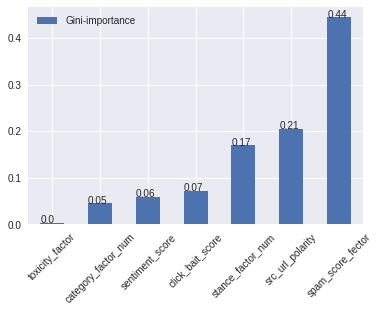

In [0]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, rfc.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
ax = importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=2)), (p.get_x(), p.get_height()))

#### Validation

In [0]:
print(confusion_matrix(y_test,rfc_pred))

[[471  35]
 [ 21 401]]


In [0]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.96      0.93      0.94       506
          1       0.92      0.95      0.93       422

avg / total       0.94      0.94      0.94       928



In [0]:

#from sklearn.metrics import accuracy_score 
print ("Accuracy : ", metrics.accuracy_score(y_test,rfc_pred)*100 )

Accuracy :  93.96551724137932


In [0]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,rfc_pred) #y_target, y_pred

0.0603448275862069

In [0]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test,rfc_pred) #y_target, y_pred

0.0603448275862069

In [0]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test,rfc_pred)

2.084266663820103

Model Accuracy for Decision tree: 90.40948275862068


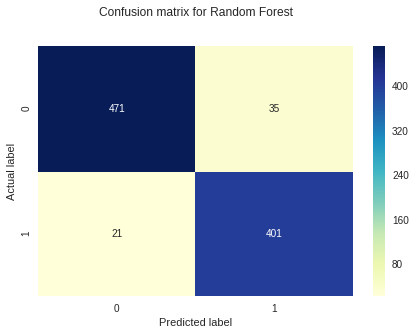

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_rf = metrics.confusion_matrix(y_test, rfc_pred)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Decision tree:",metrics.accuracy_score(y_test, y_pred)  * 100)

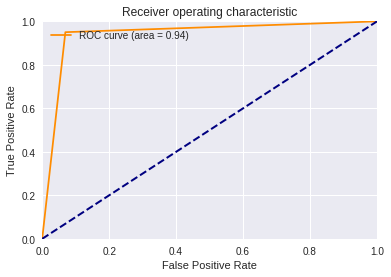

In [0]:
get_roc(y_test,rfc_pred)

As the area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test.

Average precision-recall score : 0.8965857867133653


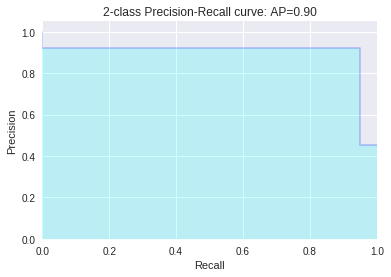

In [0]:
get_prec_recall(y_test,rfc_pred)

In [0]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
accuracies.mean()


0.9313207498517315

In [0]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(rfc, X_train, y_train, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(rfc.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
RandomForestClassifier average accuracy: 0.929 (+/-0.017)
RandomForestClassifier average log_loss: 0.208 (+/-0.056)
RandomForestClassifier average auc: 0.972 (+/-0.009)


Random forests provides 93% accuracy and higher cross validation auc than other classfication algorithms

### SVM

In [0]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'rbf', random_state = 0, gamma=0.8, C=100, probability=True)
svcclassifier.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.8, kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [0]:
svc_pred = svcclassifier.predict(X_test)

In [0]:
#print (svcclassifier.get_feature_names())
print(classification_report(y_test,svc_pred))

             precision    recall  f1-score   support

          0       0.95      0.91      0.93       506
          1       0.90      0.94      0.92       422

avg / total       0.93      0.92      0.92       928



In [0]:
#from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,svc_pred)*100)

Accuracy :  92.45689655172413


In [0]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,svc_pred) #y_target, y_pred

0.07543103448275862

In [0]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test,svc_pred) #y_target, y_pred

0.07543103448275862

In [0]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test,svc_pred)

2.605334406819081

Model Accuracy for SVM: 92.45689655172413


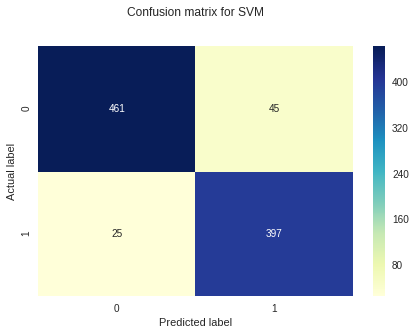

In [0]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, svc_pred)
#print(cm)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for SVM:",metrics.accuracy_score(y_test, svc_pred) * 100)


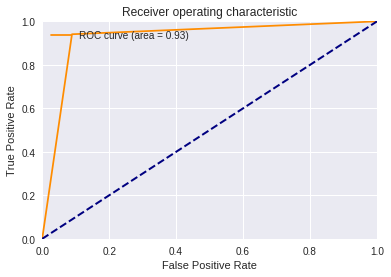

In [0]:
get_roc(y_test,svc_pred)

As the area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test.

Average precision-recall score : 0.8719193896837903


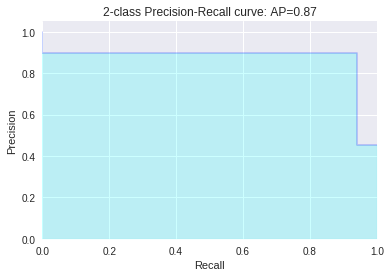

In [0]:
get_prec_recall(y_test,svc_pred)

In [0]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svcclassifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.9126273175008379

In [0]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(svcclassifier, X_train, y_train, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(svcclassifier.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
SVC average accuracy: 0.913 (+/-0.019)
SVC average log_loss: 0.235 (+/-0.036)
SVC average auc: 0.965 (+/-0.011)


Though SVM classfies better, it has less accuracy than random forests

###KNN

In [0]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knnclassifier.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
# Predicting the Test set results
knn_pred = knnclassifier.predict(X_test_pca)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_pred))

             precision    recall  f1-score   support

          0       0.91      0.89      0.90       506
          1       0.87      0.90      0.88       422

avg / total       0.89      0.89      0.89       928



In [0]:
#from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,knn_pred)*100)

Accuracy :  89.22413793103449


In [0]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,knn_pred) #y_target, y_pred

0.10775862068965517

In [0]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test,knn_pred) #y_target, y_pred

0.10775862068965517

In [0]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test,knn_pred)

3.721900017828222

Model Accuracy for KNN: 89.22413793103449


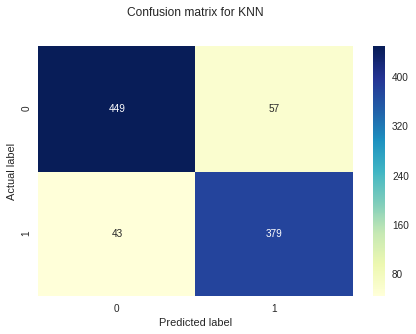

In [0]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, knn_pred)
#print(cm)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for KNN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for KNN:",metrics.accuracy_score(y_test, knn_pred) * 100)


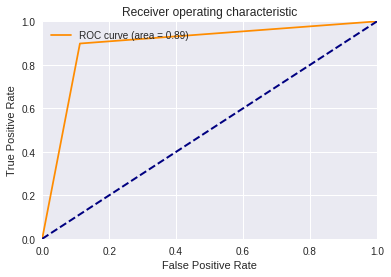

In [0]:
get_roc(y_test,knn_pred)

As the area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test.

Average precision-recall score : 0.8270277587031519


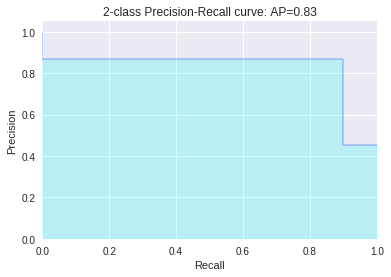

In [0]:
get_prec_recall(y_test,knn_pred)

In [0]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(knnclassifier, X_train, y_train, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(knnclassifier.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
KNeighborsClassifier average accuracy: 0.898 (+/-0.023)
KNeighborsClassifier average log_loss: 1.094 (+/-0.285)
KNeighborsClassifier average auc: 0.946 (+/-0.014)


KNN has 90% accuracy and performs classification less than SVM and Random forests

### XGBoost

In [0]:

# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
xgclassifier = XGBClassifier()
xgclassifier.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:

# Predicting the Test set results
xg_pred = xgclassifier.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [0]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, xg_pred)
print(cm)
print("Model Accuracy for XGBoost:",metrics.accuracy_score(y_test, xg_pred))


[[470  36]
 [ 17 405]]
Model Accuracy for XGBoost: 0.9428879310344828


In [0]:

print(classification_report(y_test,xg_pred))


             precision    recall  f1-score   support

          0       0.97      0.93      0.95       506
          1       0.92      0.96      0.94       422

avg / total       0.94      0.94      0.94       928



#### Feature importance and weight determination

In [0]:
xgclassifier.feature_importances_

array([0.27325583, 0.06976745, 0.12209302, 0.        , 0.24806201,
       0.125969  , 0.16085272], dtype=float32)

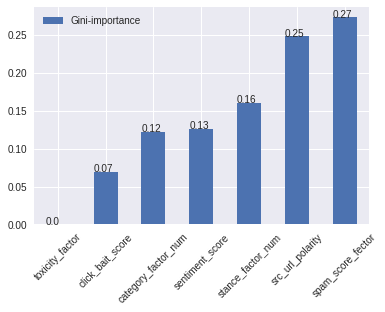

In [0]:
feats = {} # a dict to hold feature_name: feature_importance

for feature, importance in zip(X.columns, xgclassifier.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
ax = importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=2)), (p.get_x(), p.get_height()))

In [0]:

#from sklearn.metrics import accuracy_score 
print ("Accuracy : ", metrics.accuracy_score(y_test,xg_pred)*100)


Accuracy :  94.28879310344827


In [0]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,xg_pred) #y_target, y_pred

0.057112068965517244

In [0]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error  
mean_squared_error(y_test,xg_pred) #y_target, y_pred

0.057112068965517244

In [0]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test,xg_pred)

1.972611998316545

Model Accuracy for XGBoost: 94.28879310344827


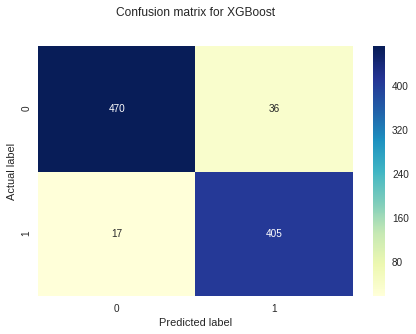

In [0]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, xg_pred)
#print(cm)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for XGBoost', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for XGBoost:",metrics.accuracy_score(y_test, xg_pred) * 100)


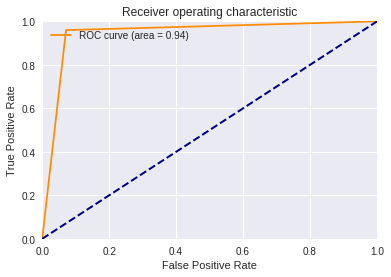

In [0]:
get_roc(y_test,xg_pred)

As the area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test.

Average precision-recall score : 0.8270277587031519


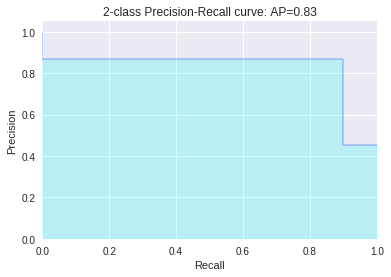

In [0]:
get_prec_recall(y_test,knn_pred)

It can be seen that XGboost performs best in terms of classification accuracy with 93.6%

### XGBoost Model with word count and domain rank

In [0]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
xgclassifier_r = XGBClassifier()
xgclassifier_r.fit(Xr_train, yr_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
# Predicting the Test set results
xgr_pred = xgclassifier_r.predict(Xr_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmr = confusion_matrix(yr_test, xgr_pred)
print(cmr)
print("Model Accuracy for XGBoost:",metrics.accuracy_score(yr_test, xgr_pred))

[[506   0]
 [  2 420]]
Model Accuracy for XGBoost: 0.9978448275862069


In [0]:
xgclassifier_r.feature_importances_

array([0.75757575, 0.24242425], dtype=float32)

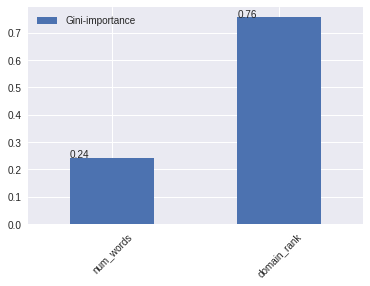

In [0]:
#Gini-importance for Domain rank and word count
feats = {} 
for feature, importance in zip(Xr.columns, xgclassifier_r.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    feats
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
ax = importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=2)), (p.get_x(), p.get_height()))

# Conclusion

Our hypothesis for polynomial equation can be visualized as follows. Ideally, models internally construct equation and predict accordingly. 
<br>

y = a1(number of words) + a2(Domain Rank) + a3(Political Affiliation) + a4(Toxicity Detection) + a5(Spam Detection) +a6(Stance Detection) + a7(Clickbait) + a8(News Category Determination) + a9*(Sentiment)
<br>
Our accuracies for the models are as follows. As XGBoost has the highest accuracy we will use XGBoost Gini-importance for weight.<br>
* Logistic Regression - 85%<br>
* Naive Bayes - 88%<br>
* Decision Tree - 90.4%<br>
* Random Forest - 93.9%<br>
* SVM - 92.4%<br>
* KNN 89.22%<br>
* XGBoost - 94.2%<br>
<br><br>
We are dividing equation in two, due to too many importent features and overfitting. Let's create two model equations. As per data availability, anyone can be used. If the domain is available, the first equation(model) with domain rank can be used.
<br>
### First Equation(if the domain is known):
y = .24*(number of words) + .76*(Domain Rank)
<br>
### Secound Equation(based on Non scalar factors):
y = 0.25*(Political Affiliation) + 0.01*(Toxicity Detection) + 0.27*(Spam Detection) + 0.16*(Stance Detection) + 0.07*(Clickbait) + 0.12*(News Category Determination) + 0.13*(Sentiment)
<br><br>
For prediction master model will be applied against non-scalar factor predictions. This model output can be subclassified for fakeness. 
<br>
Final model probability(y) can be mapped as:
 >90% = True<br>
 75-90% = Mostly True<br>
 50-75% = Half True <br>
 40-50% =  Mostly False<br>
 25-40% = False<br>
 <25% = Pants On Fire
 <br>

# Production deployment: 
For production deployment, each factor model can be converted to pickle and deployed in rest API which will be called asynchronously from the web application to get factor predictions. At last master, the model can be loaded in the form of JSON using Keras.JS/TensorFlow.JS. This Master model will be applied on factors (amalgamation approach) in the browser to give final classification prediction.

![Production deployment Architecture ](https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/ArchitectureDiagrams_FakeOrNot.png)





Thank You!